In [11]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

In [12]:
X1 = stats.norm.rvs(size = 100) # 100 random, normally distributed values
X2 = stats.norm.rvs(size = 100)
X3 = stats.norm.rvs(size = 100)
group = np.random.choice(['A','B','C'], size=100)
# Our outcome is influenced by X1, X2, and the group, plus some random noise
Y = 1.5 * X1 - 2.3 * X2 + 3 * (group == 'A') + 1.2 * (group == 'B') + stats.norm.rvs(size = 100)

# We can store these in a data frame
df = pd.DataFrame({'X1':X1,
                   'X2':X2,
                   'X3': X3,
                   'group':group,
                   'Y':Y})

## Exercise 1

Get the median and the 25th percentile value for X1

In [13]:
np.median(X1)

-0.05732819787985602

In [16]:
np.percentile(X1, 25)

-0.6909736458466931

In [17]:
np.quantile(X1, .25)

-0.6909736458466931

In [19]:
df.X1.median()

-0.05732819787985602

In [20]:
df.X1.quantile(.25)

-0.6909736458466931

## Exercise 2

Write some code that compares the correlations of each set of variables and prints the two variables with the highest correlation.

Hint: You will probably want to use two for loops (although there may also be a tricky way to do this with pandas)

In [33]:
df.corr()[df.corr() != 1].abs().max().max()

0.6369217625732326

In [36]:
stats.pearsonr(X1, X2)

(0.08276311390000485, 0.4129966861778775)

In [53]:
to_compare = [X1, X2, X3, Y]

largest_corr = 0
best_pair = None
for i in range(len(to_compare)):
    for j in range(i + 1, len(to_compare)):
        if i != j:
            curr_corr = stats.pearsonr(to_compare[i], 
                                       to_compare[j])[0]
            if abs(curr_corr) > abs(largest_corr):
                largest_corr = curr_corr
                best_pair = [i, j]

In [54]:
largest_corr

-0.6369217625732326

In [52]:
list(range(0,6,2))

[0, 2, 4]

In [47]:
largest_corr

-0.6369217625732326

In [48]:
df.corr()

,X1,X2,X3,Y
X1,1.000000,0.082763,-0.022477,0.512792
X2,0.082763,1.000000,-0.082590,-0.636922
X3,-0.022477,-0.082590,1.000000,0.116429
Y,0.512792,-0.636922,0.116429,1.000000


In [9]:
result = sm.ols(formula="Y ~ X1 + X2 + X3 + group", data=df).fit()

In [55]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           7.43e-40
Time:                        18:29:42   Log-Likelihood:                -141.42
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      94   BIC:                             310.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8905      0.184     15.679      0.000       2.524       3.257
group[T.B]    -1.8541      0.258     -7.181      0.000      -2.367      -1.341
group[T.C]    -2.7339      0.257    -10.627      0.000      -3.245      -2.223
X1             1.2615      0.100     12.583      0.000       1.062       1.461
X2            -2.0985      0.105    -19.953      0.000      -2.307      -1.890
X3            -0.1340      0.108     -1.245      0.216      -0.348       0.080
==============================================================================
Omnibus:                        0.326   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.321
Skew:                          -0.130   Prob(JB):                        0.852
Kurtosis:                       2.903   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note the benefit of regression - the coefficient for X1 is much closer to the true coefficient (1.5)

## Exercise 3

Google to figure out how to output this table as text that you could put into a Word document

In [57]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           7.43e-40
Time:                        18:30:47   Log-Likelihood:                -141.42
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      94   BIC:                             310.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8905      0.184     15.679      0.0

In [73]:
result.bse

Intercept     0.184360
group[T.B]    0.258184
group[T.C]    0.257256
X1            0.100253
X2            0.105175
X3            0.107675
dtype: float64

## Exercise 4

Think of a question in some data we've used before (crash data, Twitter data, reddit data) that a statistical test would help to answer and apply one of those covered above.

In [74]:
import seaborn as sns

In [77]:
tips = sns.load_dataset('tips')

In [91]:
males = tips.loc[tips.sex == 'Male', 'tip']
females = tips.loc[tips.sex == 'Female', 'tip']

In [93]:
females

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [94]:
stats.ttest_ind(males, females)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

<AxesSubplot:xlabel='tip', ylabel='Count'>

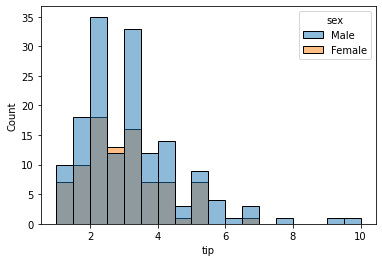

In [102]:
sns.histplot(tips, x='tip', hue='sex')#, color='sex')